In [84]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [85]:
#Importing Dataset
df = pd.read_excel('Credit Card Customer Data.xlsx')
df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [50]:
#checking the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [93]:
for col in df.columns:
    summed = df.duplicated(subset=[col]).sum()
    print(col + ':' + str(summed))

Sl_No:0
Customer Key:5
Avg_Credit_Limit:550
Total_Credit_Cards:650
Total_visits_bank:654
Total_visits_online:644
Total_calls_made:649


In [51]:
#Looking at all the basic parameters in the dataset
df.describe(percentiles = [0.25, 0.5, 0.75, 0.90])

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,330.500000,55141.443939,34574.242424,4.706061,2.403030,2.606061,3.583333
std,190.669872,25627.772200,37625.487804,2.167835,1.631813,2.935724,2.865317
min,1.000000,11265.000000,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,165.750000,33825.250000,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,330.500000,53874.500000,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,495.250000,77202.500000,48000.000000,6.000000,4.000000,4.000000,5.000000
90%,594.100000,91584.800000,71100.000000,7.000000,5.000000,5.000000,8.000000
max,660.000000,99843.000000,200000.000000,10.000000,5.000000,15.000000,10.000000


In [52]:
#Checking for null values
df.isnull().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [53]:
#Checking for duplicate rows
df.duplicated().sum()

0

In [54]:
#Dropping Sl no and Customer Key columns
df_1 = df.drop(columns = ["Sl_No", "Customer Key"])
df_1.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


**EDA**
- There are 660 rows and 7 columns
- There are no null values
- All the data types are integers
- There are duplicates in customer key but the values are different between the rows. Since we are removing the customer key, it will serve as additional data and not duplicate
- There are no duplicate rows in the dataset


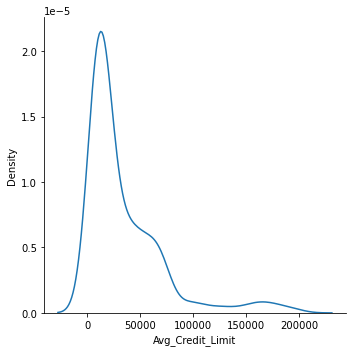

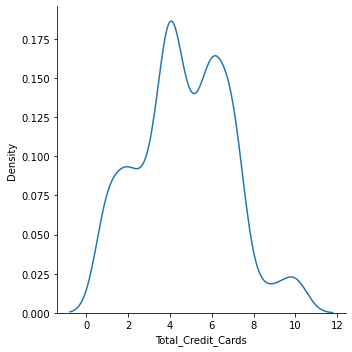

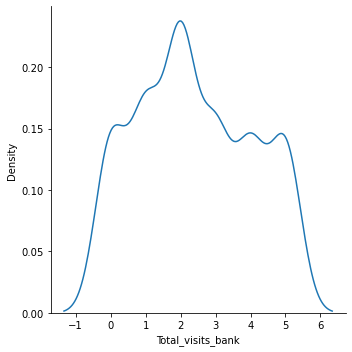

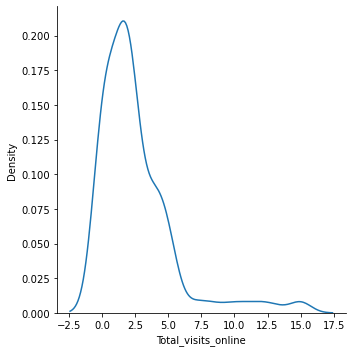

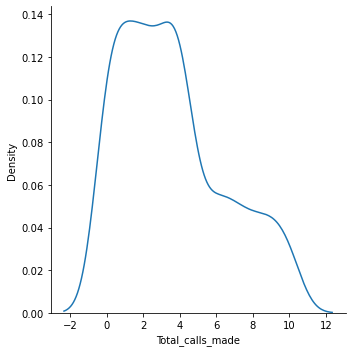

In [55]:
#Univariate Analysis
for col in df_1.columns:
    sns.displot(x = df_1[col], kind  = "kde")
    plt.show()

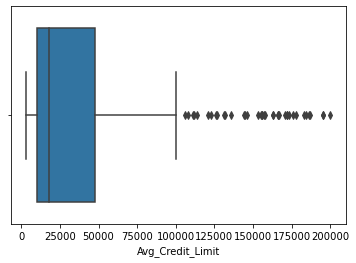

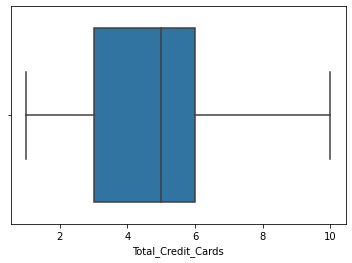

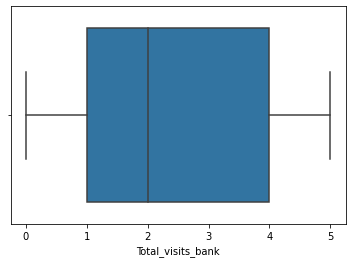

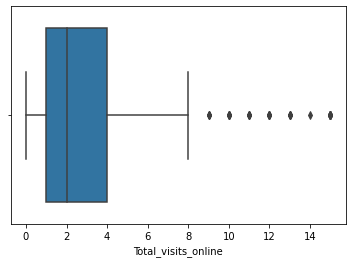

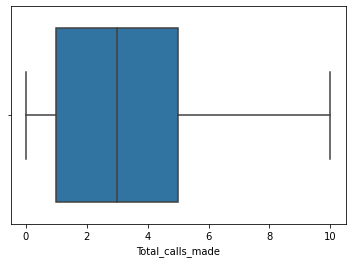

In [56]:
#Boxplot to check for outliers
for col in df_1.columns:
    sns.boxplot(x = df_1[col])
    plt.show()

In [57]:
#Treating outliers using capping method
Q1 = df_1.quantile(0.25)
Q3 = df_1.quantile(0.75)
IQR = Q3 - Q1
Lower_Fence = Q1 - (1.5 * IQR)

Upper_Fence = Q3 + (1.5 * IQR)

In [58]:
for col in df_1.columns:
    df_1[col] = df_1[col].clip(Lower_Fence[col], Upper_Fence[col])

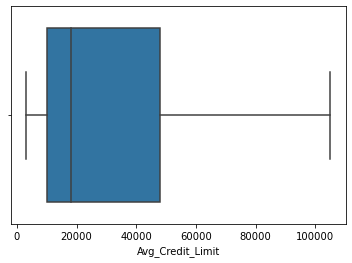

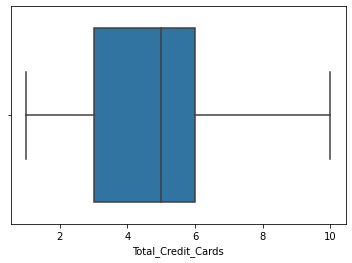

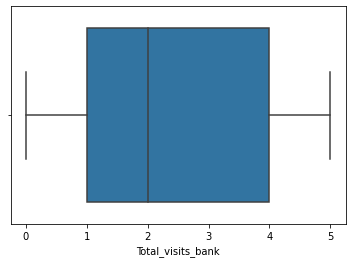

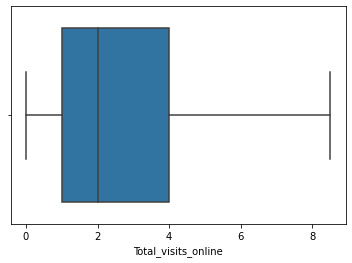

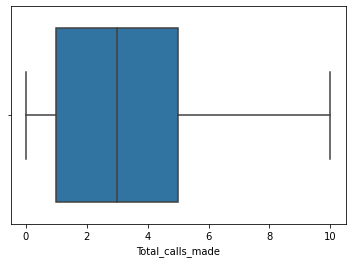

In [59]:
for col in df_1.columns:
    sns.boxplot(x = df_1[col])
    plt.show()

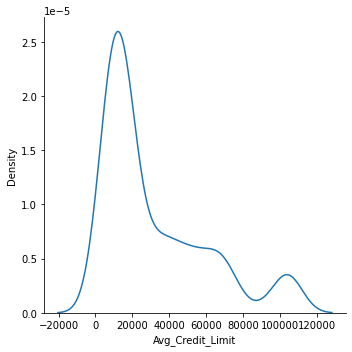

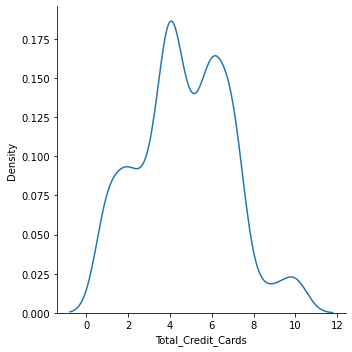

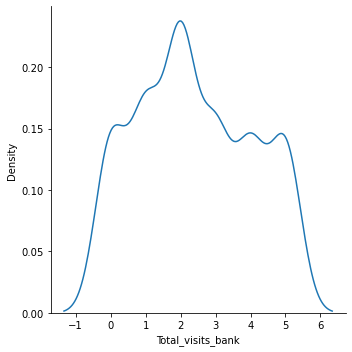

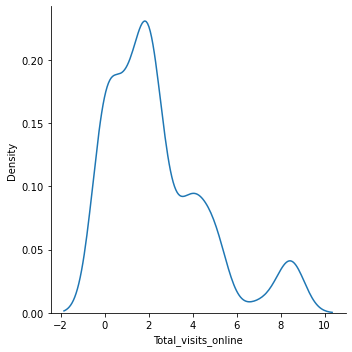

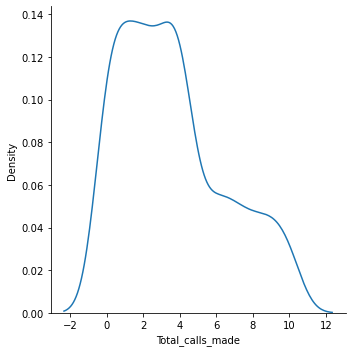

In [60]:
for col in df_1.columns:
    sns.displot(x = df_1[col], kind  = "kde")
    plt.show()

**Univariate Analysis:**
- Avg Credit limit column is right skewed
- Total credit cards has multiple peaks
- Total visits to the bank is having somewhat normal distribution
- Total visits online is left skewed
- Total calls made has 2 peaks and is sligtly left skewed
- Average Credit limit and online visits have outliers and needs to be treated

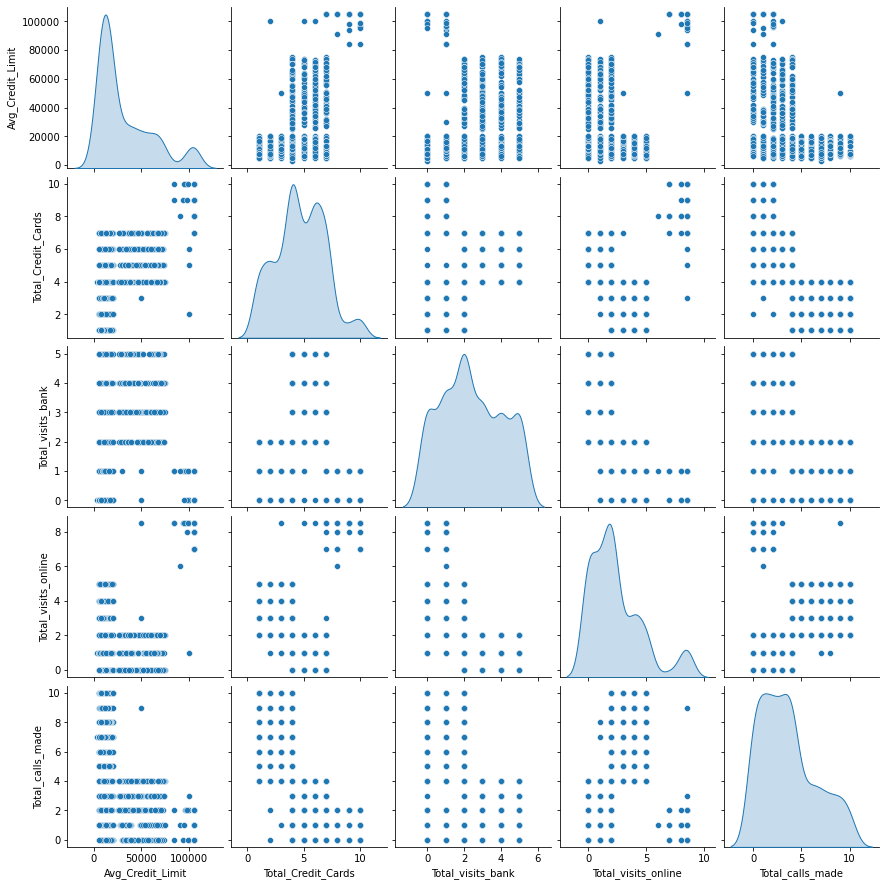

In [61]:
#Bivariate Analysis
sns.pairplot(data = df_1,diag_kind='kde')

<AxesSubplot:>

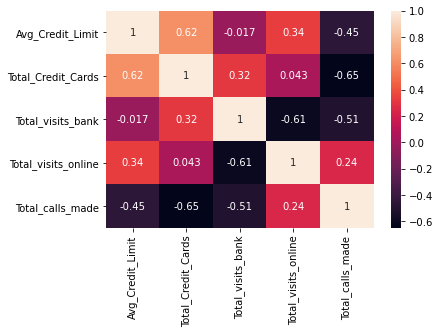

In [62]:
#Corelation between variables check
corr = df_1.corr()
sns.heatmap(corr, annot = True)

**Bivariate Analysis:**
- There is no colinearlity amongst the variables

In [63]:
#Scaling the data using standard scalar
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scale = scaler.fit_transform(df_1)
df_scale


array([[ 2.39894174, -1.24922476, -0.86045063, -0.6197673 , -1.25153737],
       [ 0.64361851, -0.78758515, -1.47373077,  2.70581334,  1.89185881],
       [ 0.64361851,  1.05897329, -0.86045063,  0.2670542 ,  0.1455276 ],
       ...,
       [ 2.57447406,  1.5206129 , -0.86045063,  2.70581334, -0.90227113],
       [ 2.57447406,  2.44389211, -0.86045063,  2.70581334, -1.25153737],
       [ 2.57447406,  1.9822525 , -1.47373077,  2.70581334, -0.55300488]])

#Finding optimal no. of clusters
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(df_1)
    prediction=model.predict(df_1)
    meanDistortions.append(sum(np.min(cdist(df_1, model.cluster_centers_, 'euclidean'), axis=1)) / df_scale
                           .shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

**Elbow Diagram:**
 - From the data distribution, it looks like 3 clustures will be a good option

In [65]:
#Set the value of k=3
kmeans = KMeans(n_clusters=3, n_init = 15)
kmeans.fit(df_scale)

KMeans(n_clusters=3, n_init=15)

In [141]:
prediction = kmeans.predict(df_scale)

In [123]:
#Converting scaled data to dataframe
df_scled_data = pd.DataFrame(data = df_scale, columns = ['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made'] )
df_scled_data.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,2.398942,-1.249225,-0.860451,-0.619767,-1.251537
1,0.643619,-0.787585,-1.473731,2.705813,1.891859
2,0.643619,1.058973,-0.860451,0.267054,0.145528
3,-0.058511,0.135694,-0.860451,-0.619767,0.145528
4,2.398942,0.597334,-1.473731,2.705813,-0.203739


In [124]:
#Joining the lables into the scaled dataframe
df_scled_data = df_scled_data.join(df_lables)
df_scled_data.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,lables
0,2.398942,-1.249225,-0.860451,-0.619767,-1.251537,2
1,0.643619,-0.787585,-1.473731,2.705813,1.891859,1
2,0.643619,1.058973,-0.860451,0.267054,0.145528,2
3,-0.058511,0.135694,-0.860451,-0.619767,0.145528,2
4,2.398942,0.597334,-1.473731,2.705813,-0.203739,0


In [75]:
#Printing the lables
df_lables = pd.DataFrame(kmeans.labels_, columns=['lables'])
df_lables

,lables
0,2
1,1
2,2
3,2
4,0
...,...
655,0
656,0
657,0
658,0


In [77]:
#Jonining lables in the original dataset
df_labled = df_1.join(df_lables)
df_labled.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,lables
0,100000,2,1,1.0,0,2
1,50000,3,0,8.5,9,1
2,50000,7,1,3.0,4,2
3,30000,5,1,1.0,4,2
4,100000,6,0,8.5,3,0


array([<AxesSubplot:title={'center':'Avg_Credit_Limit'}, xlabel='[lables]'>,
       <AxesSubplot:title={'center':'Total_Credit_Cards'}, xlabel='[lables]'>,
       <AxesSubplot:title={'center':'Total_calls_made'}, xlabel='[lables]'>,
       <AxesSubplot:title={'center':'Total_visits_bank'}, xlabel='[lables]'>,
       <AxesSubplot:title={'center':'Total_visits_online'}, xlabel='[lables]'>],
      dtype=object)

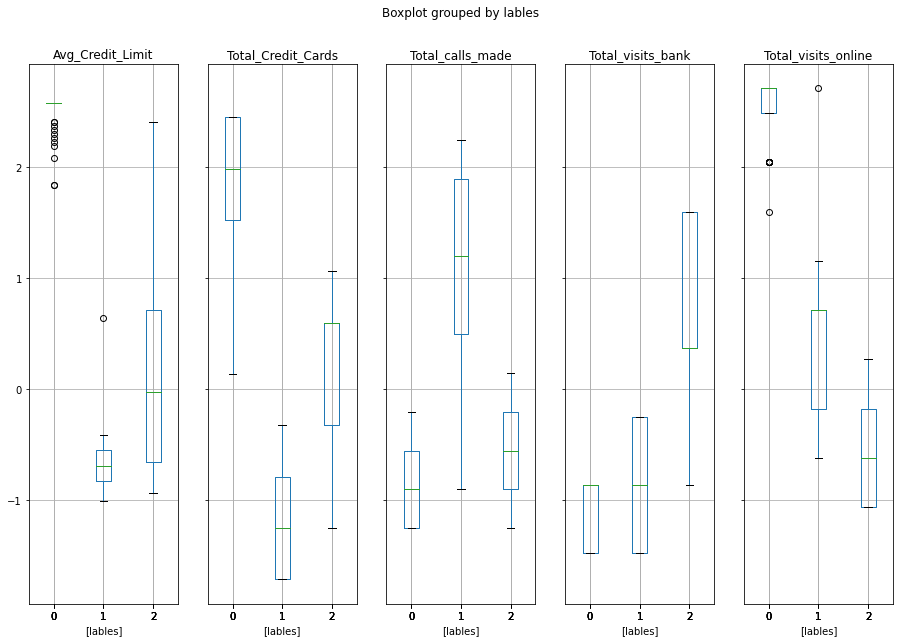

In [130]:
#Visualizing the distribution of data column wise and grouped by the clusters
df_scled_data.boxplot(by = 'lables',  layout=(1,5), figsize=(15, 10))

**Analysis from the Boxplot - K Means:**
- People with higher credit card limit, had higher number of credit cards and contacted the bank via online
- People with less credit cards had lower credit limit, contacted the bank through phone calls
- People with average credit limit had average number of credit cards and contacted the bank by visiting the bank

In [142]:
# Calculate Avg Silhoutte Score for K Means
from sklearn.metrics import silhouette_score
silhouette_score(df_scale,prediction)

0.5169867470092899

In [134]:
df_scaled_h = df_scled_data.drop(columns = ['lables'], axis = 1)
df_scaled_h.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,2.398942,-1.249225,-0.860451,-0.619767,-1.251537
1,0.643619,-0.787585,-1.473731,2.705813,1.891859
2,0.643619,1.058973,-0.860451,0.267054,0.145528
3,-0.058511,0.135694,-0.860451,-0.619767,0.145528
4,2.398942,0.597334,-1.473731,2.705813,-0.203739


In [137]:
df_scaled_h.shape

(660, 5)

In [147]:
from scipy.spatial.distance import pdist

In [150]:
methods = ['single', 'complete', 'average', 'weighted', 'centroid', 'median', 'ward']

In [151]:
#Creating linkages and checking the best method
from scipy .cluster.hierarchy import linkage,dendrogram, cophenet
for val in methods: 
    Z = linkage(df_scaled_h, method = val, metric='euclidean')
    c, cph_dist = cophenet(Z, pdist(df_scaled_h))
    print(val + ':' + str(c))


single:0.6666982080229052
complete:0.8207884321476555
average:0.8926672966587861
weighted:0.8872365340578665
centroid:0.8880634847869346
median:0.8887160179419454
ward:0.7702265240776373


**Best Linkage Type:**
- Average method is the best method for linkages

In [152]:
#Using avergae distance as linkage method and creating linkages
Z_avg = linkage(df_scaled_h, method = 'average', metric='euclidean')
Z_avg.shape

(659, 4)

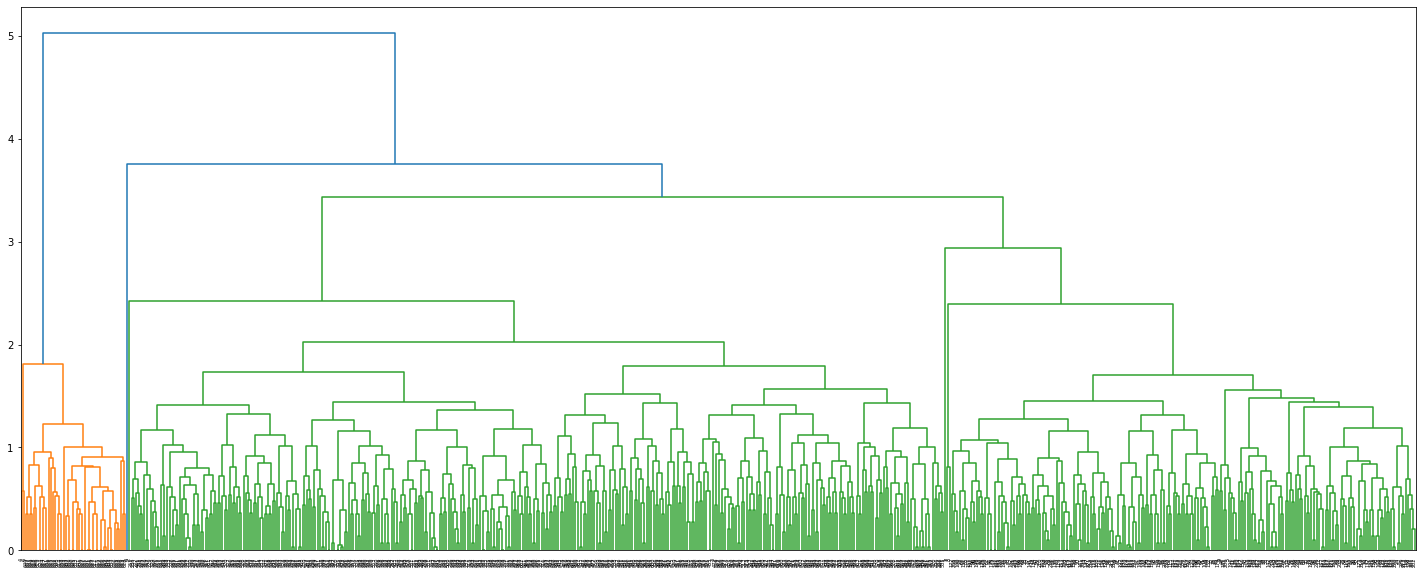

In [153]:
#Creating Dendrograms
plt.figure(figsize=(25, 10))
dendrogram(Z_avg)
plt.show()

In [160]:
#Setting the distance on dendrogram to form clusters
max_d = 4

In [161]:
#Creating clusters
from scipy.cluster.hierarchy import fcluster
clusters = fcluster(Z_avg, max_d, criterion='distance')
clusters

array([2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [162]:
#Silhouette score for HC
silhouette_score(df_scaled_h,clusters)

0.5172480049319457

In [163]:
#Creating the cluster dataftame
df_lables_h = pd.DataFrame(clusters, columns=['lables'])
df_lables_h

,lables
0,2
1,2
2,2
3,2
4,1
...,...
655,1
656,1
657,1
658,1


In [165]:
#Appending the clusters to the dataframe
df_scaled_h = df_scaled_h.join(df_lables_h)
df_scaled_h.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,lables
0,2.398942,-1.249225,-0.860451,-0.619767,-1.251537,2
1,0.643619,-0.787585,-1.473731,2.705813,1.891859,2
2,0.643619,1.058973,-0.860451,0.267054,0.145528,2
3,-0.058511,0.135694,-0.860451,-0.619767,0.145528,2
4,2.398942,0.597334,-1.473731,2.705813,-0.203739,1


array([<AxesSubplot:title={'center':'Avg_Credit_Limit'}, xlabel='[lables]'>,
       <AxesSubplot:title={'center':'Total_Credit_Cards'}, xlabel='[lables]'>,
       <AxesSubplot:title={'center':'Total_calls_made'}, xlabel='[lables]'>,
       <AxesSubplot:title={'center':'Total_visits_bank'}, xlabel='[lables]'>,
       <AxesSubplot:title={'center':'Total_visits_online'}, xlabel='[lables]'>],
      dtype=object)

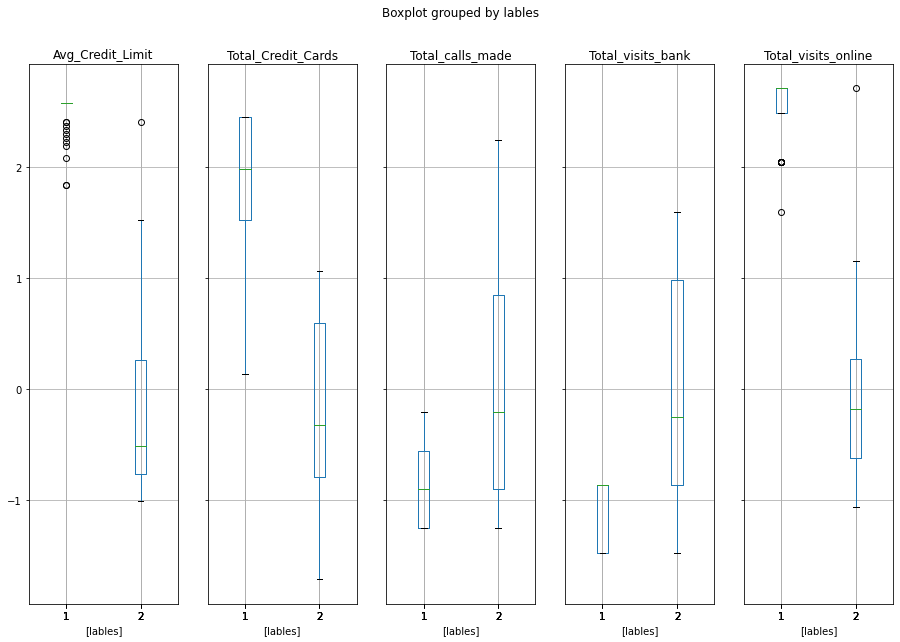

In [166]:
#Visualizing the distribution of data column wise and grouped by the clusters
df_scaled_h.boxplot(by = 'lables',  layout=(1,5), figsize=(15, 10))

**Box plot Analysis for HC:**
- People with higher credit card limit had more credit cards and contacted the bank through online
- People with lower credit card limits had lesser number of credit cards and contacted bank through visits

In [169]:
scores = {'K-Means':[3,0.516], 'Hierarchical Clustering': [2, 0.517]}

In [170]:
pd.DataFrame(scores, index = ['Number of clusters', 'Silhouette Score'])

,K-Means,Hierarchical Clustering
Number of clusters,3.000,2.000
Silhouette Score,0.516,0.517


**Comparing K-Means and Hierarchial Clustering:**
- K Means had the best Silhouette Score	with 3 clusters
- Hierarchial Clustering had the best Silhouette Score with 2 clusters
- Hierarchial Clustering has a higher Silhouette Score when compared to K-Means
- Both the methods have the similar inferance for the business problem

**Cluster Analysis:**
- Cluster 0 are people with higher credit card limit had more credit cards and contacted the bank through online
- Cluster 1 are people with lower credit card limits had lesser number of credit cards and contacted bank through visits


**Business Problem Answers:**
- There are 2 segments of customers
- Customers between the segments differ with credit limit, number of credit cards and also the way they contacted the bank
- Recomendations for the bank are to target customers with lower credit limit and lower number of credit cards to increase customer base
- Most of the customers contacted the bank through online method. The bank needs to concentrate on improving the online customer service